In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from pathlib import Path
from matplotlib.colors import ListedColormap, BoundaryNorm

In [7]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 9)
pd.set_option('display.float_format', '{:.6f}'.format)

In [8]:
asset = 'BTC' 
freq = '1sec'

DATA_DIR = Path('../dataset')
path = DATA_DIR / f"{asset}_{freq}.csv"
if path.exists():
    print(f'Loading {asset} from {path}')
    df = pd.read_csv(path,index_col=0)
    df['timestamp'] = pd.to_datetime(df["system_time"])
    df['timestamp'] = df['timestamp'].dt.round('1s')
    df = df.sort_values('timestamp').set_index('timestamp')
    print(f"{asset}: {df.shape[0]} rows, {df.shape[1]} columns")
    display(df.head(3))
else:
    print(f'File {path} does not exist.')

Loading BTC from ../dataset/BTC_1sec.csv
BTC: 1030728 rows, 155 columns


,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-04-07 11:32:42+00:00,2021-04-07 11:32:42.122161+00:00,56035.995000,0.010000,0.000000,0.000000,-0.000000,-0.000000,-0.000050,-0.000245,-0.000288,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-07 11:32:43+00:00,2021-04-07 11:32:43.122161+00:00,56035.995000,0.010000,0.000000,0.000000,-0.000000,-0.000000,-0.000050,-0.000245,-0.000288,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-07 11:32:44+00:00,2021-04-07 11:32:44.122161+00:00,56035.995000,0.010000,0.000000,0.000000,-0.000000,-0.000000,-0.000050,-0.000245,-0.000288,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Missing and Zero values

In [9]:
print(f"Missing values: {df.isna().sum().sum()} total ({(df.isna().sum().sum()/df.size)*100:.3f}%)")

Missing values: 0 total (0.000%)


There are no missing values

In [10]:
print(f"Zero values: {df.isin([0]).sum().sum()} total ({(df.isin([0]).sum().sum()/df.size)*100:.3f}%)")

Zero values: 76719506 total (48.021%)


But there are a lot of Zero values

In [11]:
# check for all columns except those related to 'market', 'cancel', 'limit'
most_zeros = df.columns.str.contains('market|cancel|limit', case=False)

print(f"Zero values without market/cancel/limit columns: {df[df.columns[~most_zeros]].isin([0]).sum().sum()} total ({(df[df.columns[~most_zeros]].isin([0]).sum().sum()/df[df.columns[~most_zeros]].size)*100:.3f}%)")
df[df.columns[~most_zeros]].isin([0]).sum().nlargest(5)

Zero values without market/cancel/limit columns: 810741 total (1.210%)


sells               566264
buys                242481
asks_notional_0        772
bids_notional_0        696
bids_notional_10        49
dtype: int64

Most zero values are in additional descriptive columns {'market', 'cancel', 'limit'} 

In [12]:
market_columns = df.columns.str.contains('market', case=False)

print(f"Zero values in market columns: {df[df.columns[market_columns]].isin([0]).sum().sum()} total ({(df[df.columns[market_columns]].isin([0]).sum().sum()/df[df.columns[market_columns]].size)*100:.3f}%)")
df[df.columns[market_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in market columns: 29853123 total (96.544%)


bids_market_notional_14    1030383
bids_market_notional_13    1030232
bids_market_notional_12    1030072
asks_market_notional_14    1029969
bids_market_notional_11    1029859
asks_market_notional_13    1029773
bids_market_notional_10    1029561
asks_market_notional_12    1029393
bids_market_notional_9     1029232
asks_market_notional_11    1028962
bids_market_notional_8     1028777
asks_market_notional_10    1028373
bids_market_notional_7     1028049
asks_market_notional_9     1027727
bids_market_notional_6     1027173
asks_market_notional_8     1026821
bids_market_notional_5     1025973
asks_market_notional_7     1025659
bids_market_notional_4     1024339
asks_market_notional_6     1023799
bids_market_notional_3     1021789
asks_market_notional_5     1021767
asks_market_notional_4     1018572
bids_market_notional_2     1017702
asks_market_notional_3     1014093
bids_market_notional_1     1010205
asks_market_notional_2     1006628
asks_market_notional_1      990062
bids_market_notional

In [13]:
cancel_columns = df.columns.str.contains('cancel', case=False)

print(f"Zero values in cancel columns: {df[df.columns[cancel_columns]].isin([0]).sum().sum()} total ({(df[df.columns[cancel_columns]].isin([0]).sum().sum()/df[df.columns[cancel_columns]].size)*100:.3f}%)")
df[df.columns[cancel_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in cancel columns: 28736068 total (92.931%)


asks_cancel_notional_14    1013667
asks_cancel_notional_13    1012675
bids_cancel_notional_14    1012251
asks_cancel_notional_12    1011091
bids_cancel_notional_13    1010586
asks_cancel_notional_11    1009321
bids_cancel_notional_12    1007827
asks_cancel_notional_10    1006634
bids_cancel_notional_11    1005647
asks_cancel_notional_9     1003452
bids_cancel_notional_10    1002091
asks_cancel_notional_8     1000412
bids_cancel_notional_9      999409
asks_cancel_notional_7      997034
bids_cancel_notional_8      995305
asks_cancel_notional_6      991734
bids_cancel_notional_7      990636
asks_cancel_notional_5      986392
bids_cancel_notional_6      985461
bids_cancel_notional_5      978300
asks_cancel_notional_4      977889
bids_cancel_notional_4      967958
asks_cancel_notional_3      966870
asks_cancel_notional_2      959322
bids_cancel_notional_3      953262
asks_cancel_notional_1      950200
bids_cancel_notional_2      939952
bids_cancel_notional_1      930781
asks_cancel_notional

In [14]:
limit_columns = df.columns.str.contains('limit', case=False)

print(f"Zero values in limit columns: {df[df.columns[limit_columns]].isin([0]).sum().sum()} total ({(df[df.columns[limit_columns]].isin([0]).sum().sum()/df[df.columns[limit_columns]].size)*100:.3f}%)")
df[df.columns[limit_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in limit columns: 17319574 total (56.011%)


asks_limit_notional_14    725496
asks_limit_notional_13    710532
asks_limit_notional_12    696967
bids_limit_notional_14    683630
asks_limit_notional_11    681940
asks_limit_notional_10    668672
bids_limit_notional_13    665477
asks_limit_notional_9     654426
bids_limit_notional_12    646187
asks_limit_notional_8     642733
asks_limit_notional_7     630649
bids_limit_notional_11    626058
asks_limit_notional_6     618113
bids_limit_notional_10    609414
asks_limit_notional_5     606763
bids_limit_notional_9     595181
asks_limit_notional_4     591862
bids_limit_notional_8     582892
bids_limit_notional_7     573465
asks_limit_notional_3     565497
bids_limit_notional_6     563964
bids_limit_notional_5     555522
bids_limit_notional_4     541695
bids_limit_notional_3     516417
asks_limit_notional_2     509043
asks_limit_notional_1     498414
bids_limit_notional_1     462697
bids_limit_notional_2     457826
asks_limit_notional_0     260634
bids_limit_notional_0     177408
dtype: int

Market and Cancel columns can include up to 90% of zero values (even for the 1st or 2nd level)

Limit_Notinal Asks and Bids include a half of zero values.

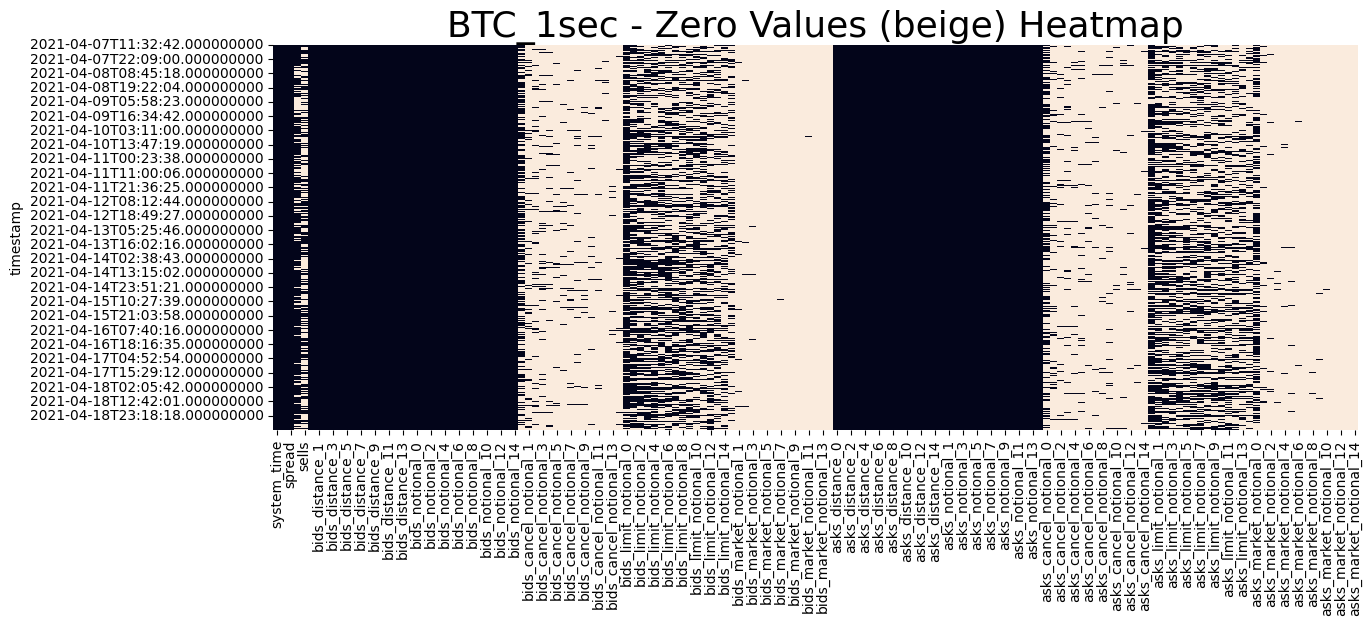

In [15]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.heatmap(df == 0, cbar=False, ax=ax)
plt.title(f'{asset}_{freq} - Zero Values (beige) Heatmap', fontsize=26)
plt.show()

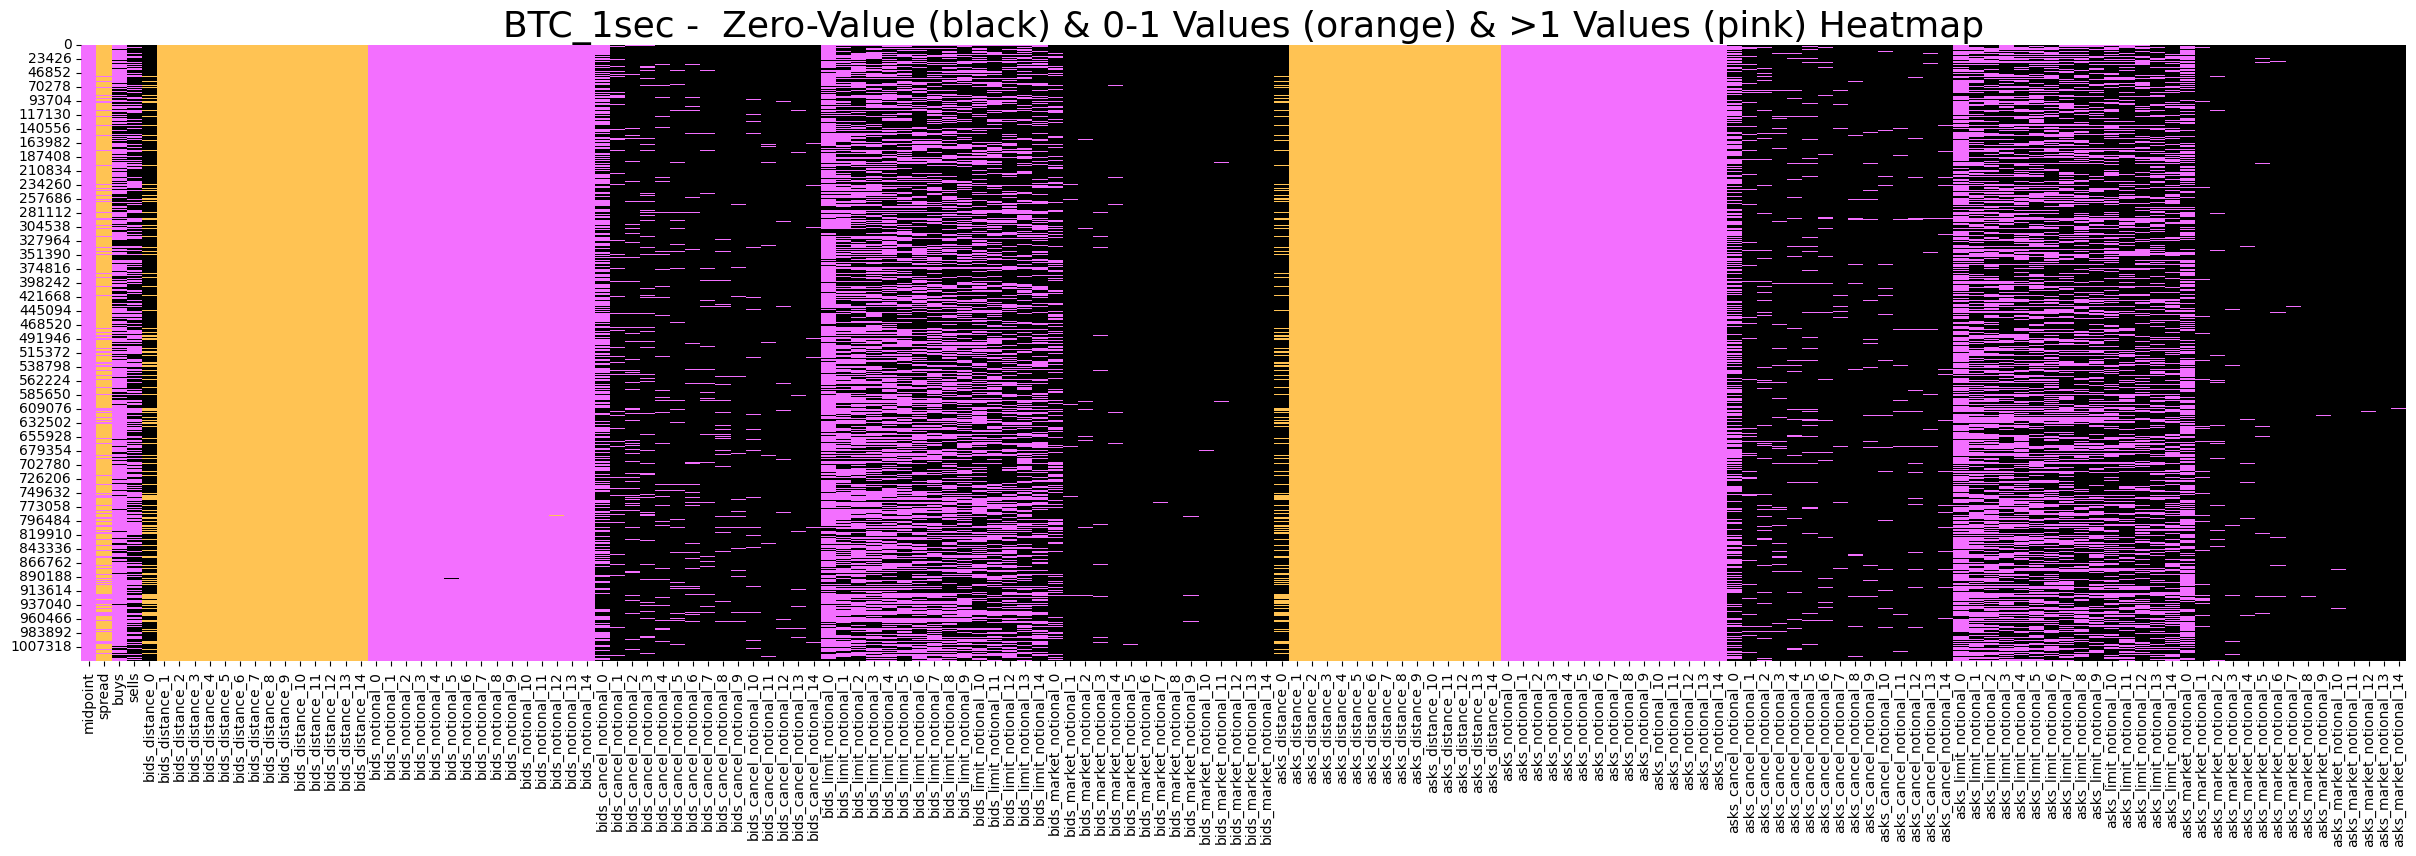

In [16]:

threshold_0 = 1e-7 
bins = np.array([threshold_0, 1.0])
data_abs = df.select_dtypes(include=[np.number]).abs().values
categories = np.digitize(data_abs, bins)

cmap_colors = ["#000000",  # 0
               "#ffc353",  #  (0, 1]
               "#f36fff"]  #  > 1
cmap = ListedColormap(cmap_colors)
norm = BoundaryNorm([0, 1, 2, 3], cmap.N) 


fig, ax = plt.subplots(figsize=(30, 8))
sns.heatmap(categories, 
            cmap=cmap, 
            norm=norm, 
            cbar=False,  
            ax=ax,
            xticklabels=df.select_dtypes(include=[np.number]).columns)

ax.set_title(f'{asset}_{freq} -  Zero-Value (black) & 0-1 Values (orange) & >1 Values (pink) Heatmap', fontsize=26)
plt.show()

Overall the data is well marked because there are no missing values and Zero values happens usually happens in the columns that are logically correct (Market and Cancel bids and asks). In the cryptocurancy the vast of trade orders are executed via "limit" operations, which is approved by the data. 

## General statistics

In [17]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 9)
pd.set_option('display.float_format', '{:.6f}'.format)

display(df.describe().transpose())

pd.reset_option('display.float_format')

,count,mean,std,min,25%,50%,75%,max
midpoint,1030728.000000,59975.070201,2490.048794,51978.180000,58000.005000,60146.585000,62187.755000,64896.745000
spread,1030728.000000,1.314033,4.713295,0.010000,0.010000,0.010000,0.010000,1245.100000
buys,1030728.000000,6060.057859,32348.185597,0.000000,8.971300,264.087398,1747.150796,4060005.148314
sells,1030728.000000,5278.900158,35807.570567,0.000000,0.000000,0.000000,603.014795,5215817.000898
bids_distance_0,1030728.000000,-0.000011,0.000042,-0.011172,-0.000000,-0.000000,-0.000000,-0.000000
bids_distance_1,1030728.000000,-0.000047,0.000067,-0.011221,-0.000070,-0.000028,-0.000003,-0.000000
bids_distance_2,1030728.000000,-0.000078,0.000080,-0.011222,-0.000107,-0.000061,-0.000026,-0.000000
bids_distance_3,1030728.000000,-0.000104,0.000091,-0.011229,-0.000140,-0.000086,-0.000043,-0.000001
bids_distance_4,1030728.000000,-0.000128,0.000101,-0.011229,-0.000171,-0.000109,-0.000062,-0.000001
bids_distance_5,1030728.000000,-0.000151,0.000111,-0.011234,-0.000198,-0.000132,-0.000080,-0.000001


The only negative are "bids_distance_X", because they are calculated as "behind" midpoint.

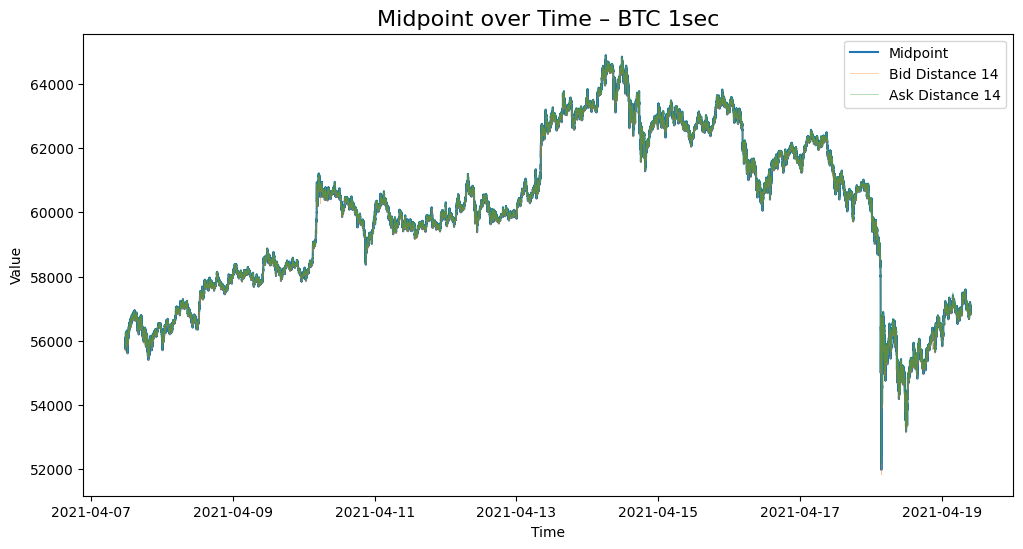

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['midpoint'], label='Midpoint', linewidth=1.5)
plt.plot(df.index, (1+df['bids_distance_14'])*df['midpoint'], label='Bid Distance 14', linewidth=0.5, alpha=0.5)
plt.plot(df.index, (1+df['asks_distance_14'])*df['midpoint'], label='Ask Distance 14', linewidth=0.5, alpha=0.5)
plt.legend()
plt.title(f'Midpoint over Time – {asset} {freq}', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

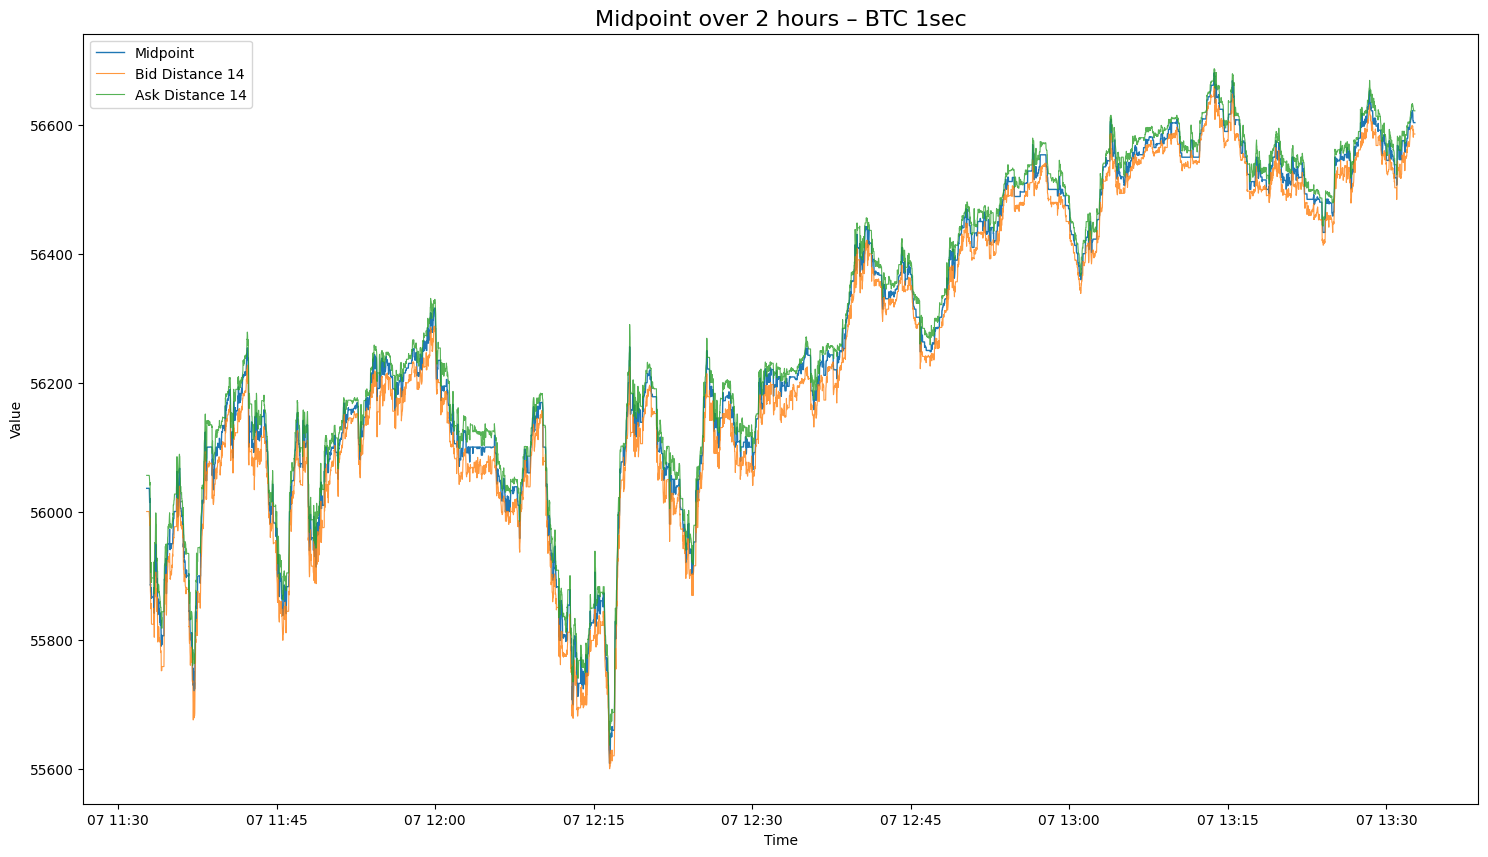

In [19]:
df_1day = df[df.index <= (df.index.min() + pd.Timedelta('2 hours'))]

plt.figure(figsize=(18, 10))
plt.plot(df_1day.index, df_1day['midpoint'], label='Midpoint', linewidth=1)
plt.plot(df_1day.index, (1+df_1day['bids_distance_14'])*df_1day['midpoint'], label='Bid Distance 14', linewidth=0.8, alpha=0.8)
plt.plot(df_1day.index, (1+df_1day['asks_distance_14'])*df_1day['midpoint'], label='Ask Distance 14', linewidth=0.8, alpha=0.8)
plt.legend()
plt.title(f'Midpoint over 2 hours – {asset} {freq}', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## Example of 3 rows

In [20]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.reset_option('display.precision')
pd.reset_option('display.float_format')

transposed_df = df.head(3).transpose()
display(transposed_df)

timestamp,2021-04-07 11:32:42+00:00,2021-04-07 11:32:43+00:00,2021-04-07 11:32:44+00:00
system_time,2021-04-07 11:32:42.122161+00:00,2021-04-07 11:32:43.122161+00:00,2021-04-07 11:32:44.122161+00:00
midpoint,56035.995,56035.995,56035.995
spread,0.01,0.01,0.01
buys,0.0,0.0,0.0
sells,0.0,0.0,0.0
bids_distance_0,-0.0,-0.0,-0.0
bids_distance_1,-0.0,-0.0,-0.0
bids_distance_2,-0.00005,-0.00005,-0.00005
bids_distance_3,-0.000245,-0.000245,-0.000245
bids_distance_4,-0.000288,-0.000288,-0.000288


Even for the first 3 observations the data can highly variate. This is because of actively changing market.

In [21]:
transposed_df[transposed_df.index.str.endswith('_0')]

timestamp,2021-04-07 11:32:42+00:00,2021-04-07 11:32:43+00:00,2021-04-07 11:32:44+00:00
bids_distance_0,-0.0,-0.0,-0.0
bids_notional_0,3061.860107,3061.860107,3061.860107
bids_cancel_notional_0,0.0,0.0,0.0
bids_limit_notional_0,3061.860107,3061.860107,3061.860107
bids_market_notional_0,0.0,0.0,0.0
asks_distance_0,0.0,0.0,0.0
asks_notional_0,1902.290039,1902.290039,1902.290039
asks_cancel_notional_0,0.0,0.0,0.0
asks_limit_notional_0,1902.290039,1902.290039,1902.290039
asks_market_notional_0,0.0,0.0,0.0


The 0 level structure of the first 3 observations also shows that we are analysing actively changing market.


## Feature relatad visualizations

In [22]:
print(f'{asset} {freq} shape:', df.shape)

BTC 1sec shape: (1030728, 155)


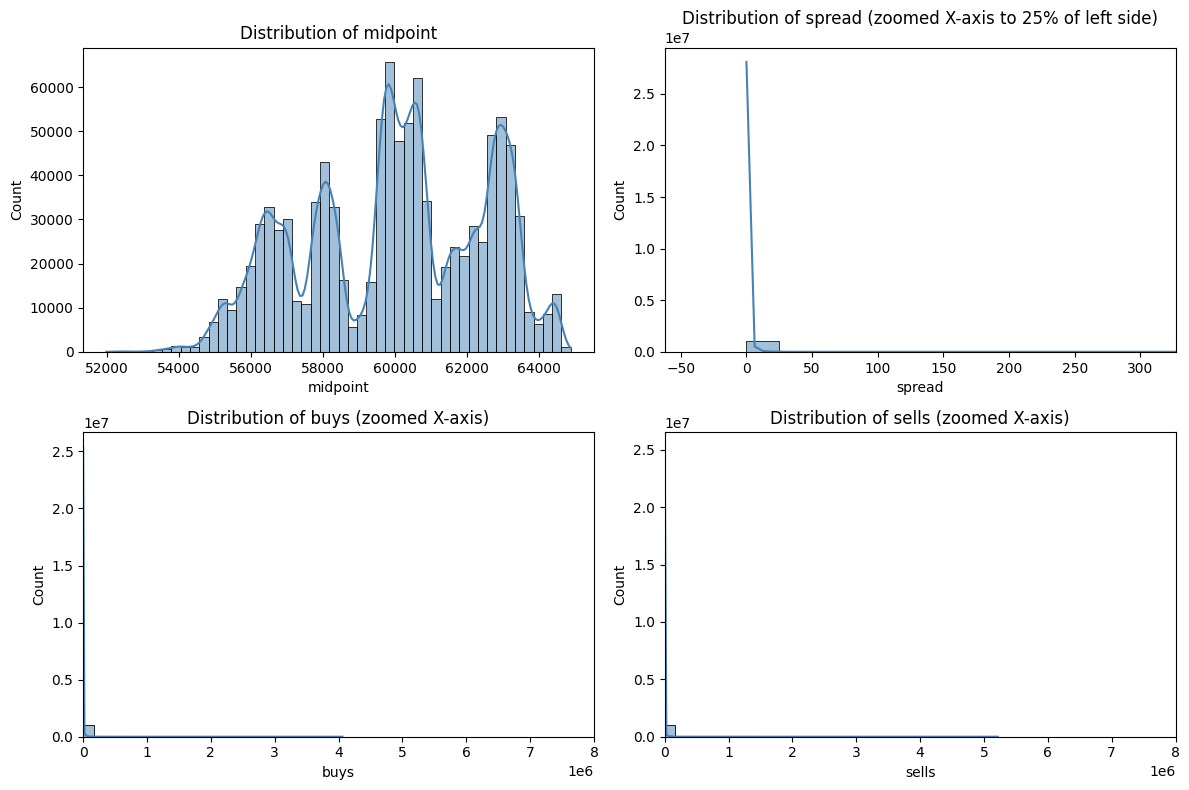

In [23]:
features_to_plot = ['midpoint', 'spread', 'buys', 'sells']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, f in enumerate(features_to_plot):
    if i==1:
        sns.histplot(df[f], bins=50, ax=axs[i], kde=True, color='steelblue')
        axs[i].set_xlim(right=axs[i].get_xlim()[1]*0.25)
        axs[i].set_title(f'Distribution of {f} (zoomed X-axis to 25% of left side)')
    elif i==2 or i==3:
        axs[i].set_xlim(right=8*1e6)
        axs[i].set_title(f'Distribution of {f} (zoomed X-axis)')
        bins = np.linspace(0, axs[i].get_xlim()[1], 50)
        sns.histplot(df[f], bins=bins, ax=axs[i], kde=True, color='steelblue')
    elif i==0:
        sns.histplot(df[f], bins=50, ax=axs[i], kde=True, color='steelblue')
        axs[i].set_title(f'Distribution of {f}')
plt.tight_layout()
plt.show()

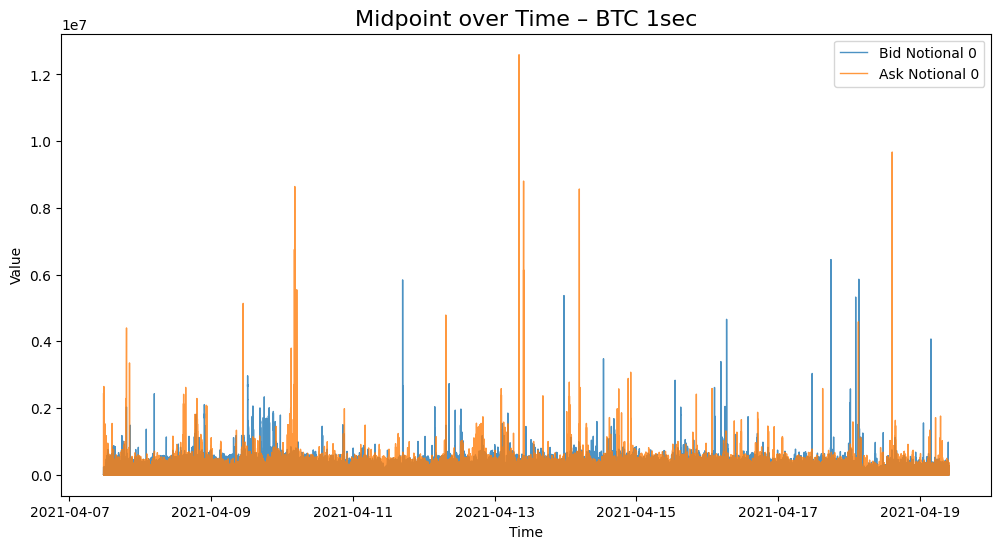

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['bids_notional_0'], label='Bid Notional 0', linewidth=1, alpha=0.8)
plt.plot(df.index, df['asks_notional_0'], label='Ask Notional 0', linewidth=1, alpha=0.8)
plt.legend()
plt.title('Midpoint over Time – {} {}'.format(asset, freq), fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

There are just a few eye-catching spots on each heatmap. The log1p scaled potentionally show more information.

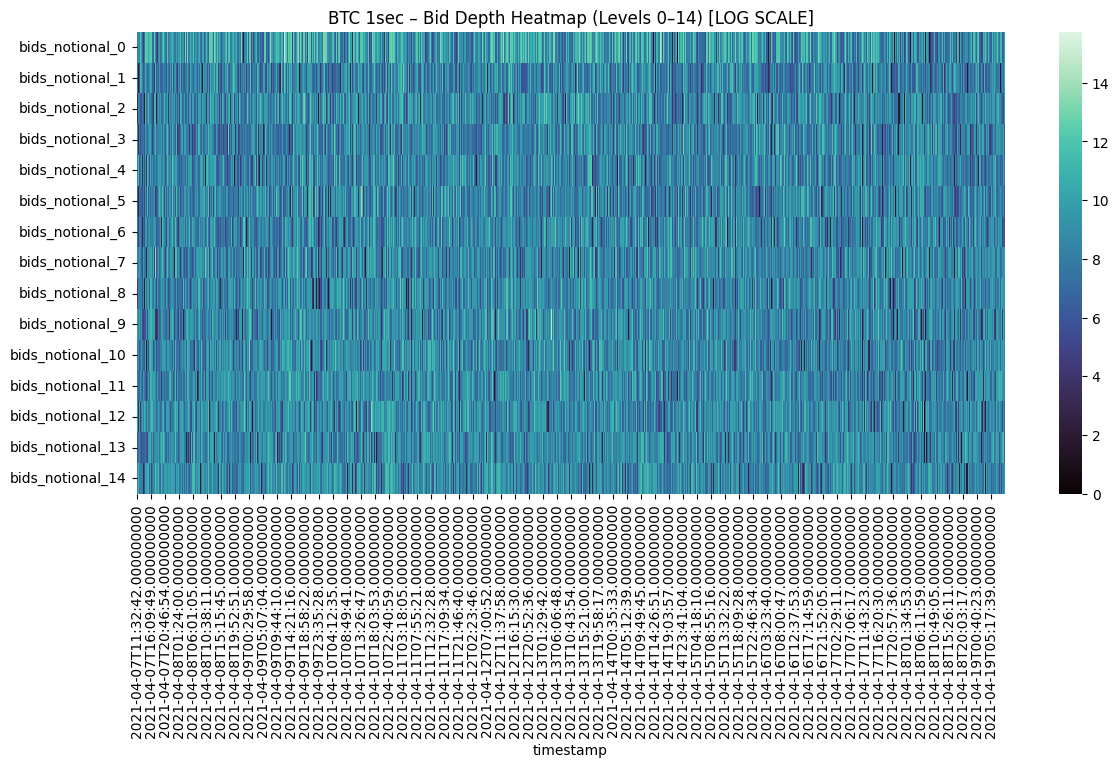

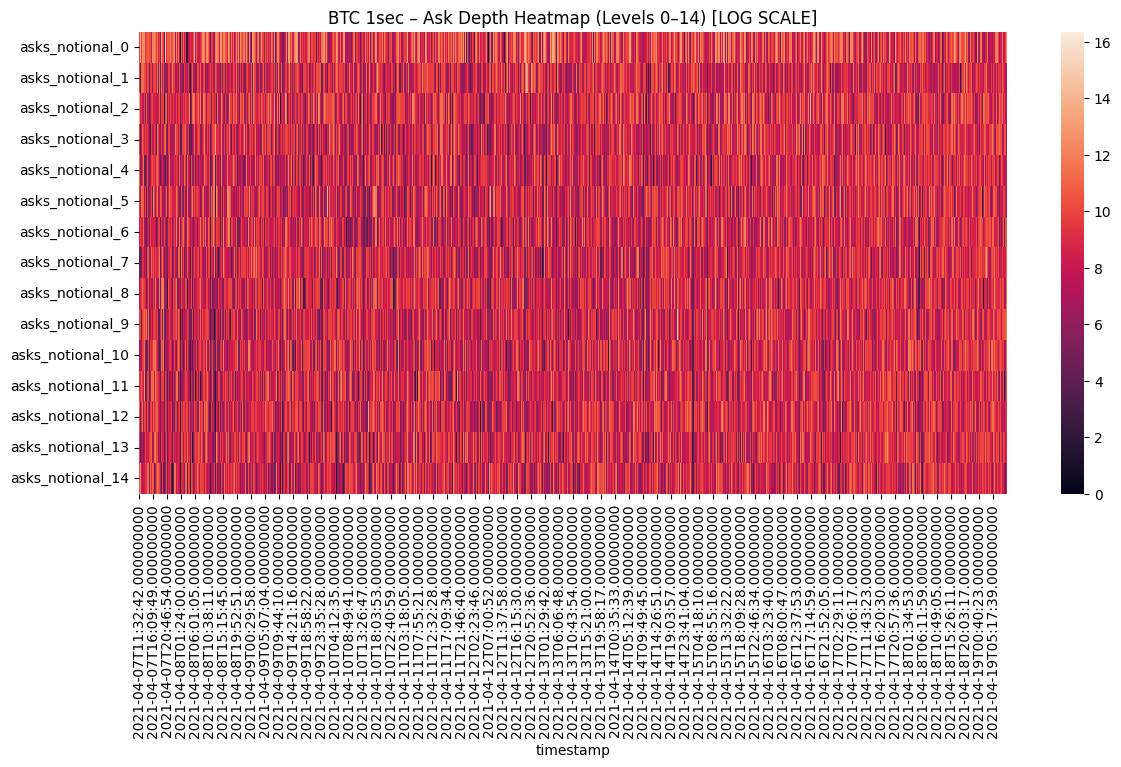

In [25]:
bid_levels = [f'bids_notional_{i}' for i in range(15)]
ask_levels = [f'asks_notional_{i}' for i in range(15)]

# Combine to 2D matrix
depth_data = pd.DataFrame({
    'timestamp': df.index,
    **{lvl: df[lvl] for lvl in bid_levels + ask_levels}
})

bid_data_log = np.log1p(depth_data[bid_levels].T)

plt.figure(figsize=(14, 6))
sns.heatmap(
    bid_data_log,
    cmap='mako', 
    cbar=True
)
plt.title(f'{asset} {freq} – Bid Depth Heatmap (Levels 0–14) [LOG SCALE]')
plt.show()

ask_data_log = np.log1p(depth_data[ask_levels].T)

plt.figure(figsize=(14, 6))
sns.heatmap(
    ask_data_log,
    cmap='rocket', 
    cbar=True
)
plt.title(f'{asset} {freq} – Ask Depth Heatmap (Levels 0–14) [LOG SCALE]')
plt.show()


At both heatmap the forst level is brighter than others (most orders executed close to the mid price). Also it is easier to understand low-volume areas (dark regions) with log scaled Notional volume. This information can be important for model. 

### Notional Volume

In [26]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_notional_{i}'], df[f'asks_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)


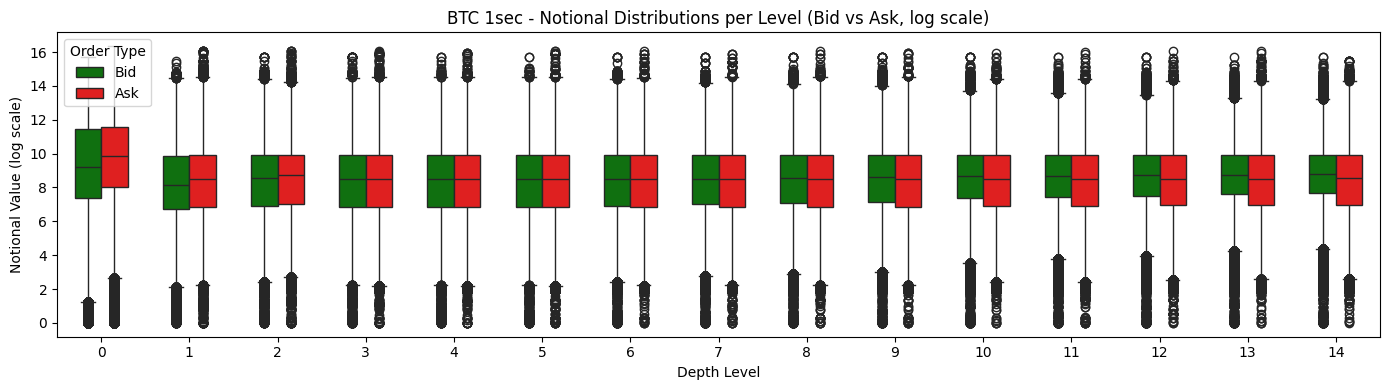

In [27]:
df_box_all['Value'] = np.log1p(df_box_all['Value'])

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.title(f'{asset} {freq} - Notional Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

The most pairs of Bid/Ask are close to earch other in terms of distribution of Notional volume, except the first level, where the volume is above other levels.

### Distance from midpoint

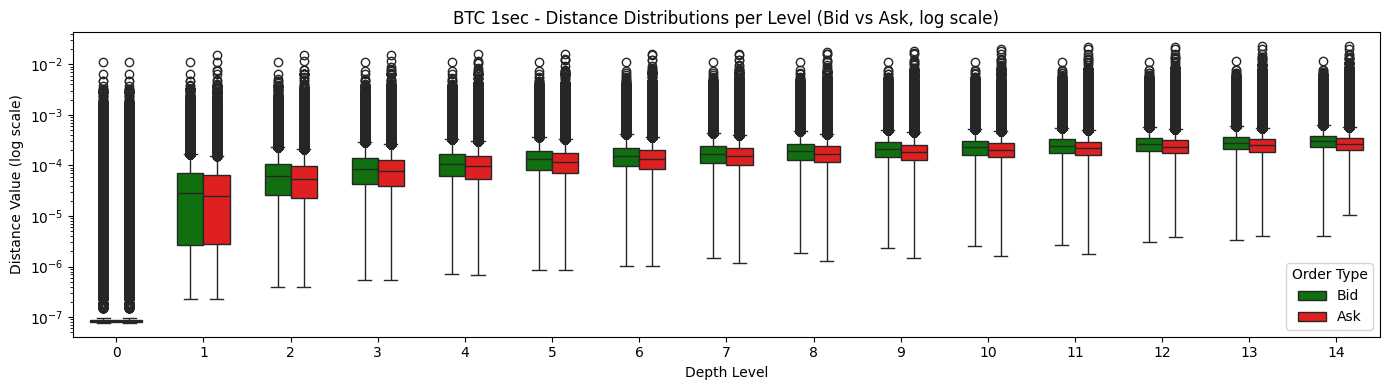

In [28]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_distance_{i}']*(-1), df[f'asks_distance_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.yscale('log') 
plt.title(f'{asset} {freq} - Distance Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Distance Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Usually the distance at the 0 level is very close to 0. At levels 1-14 the distance increases gradually.

### Calcel Volume

In [29]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_cancel_notional_{i}'], df[f'asks_cancel_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

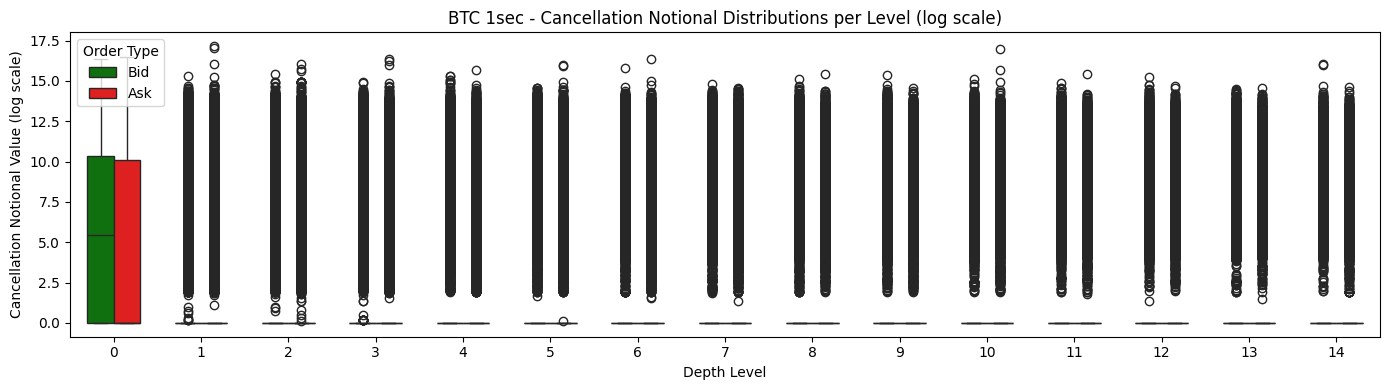

In [30]:
df_box_all['Value'] = np.log1p(df_box_all['Value']) # log scale

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Cancellation Notional Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Cancellation Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

As already discovered, there are a lot of zeros at the cancelation volumes, but for low levels the distribution exists.

### Limit Volume

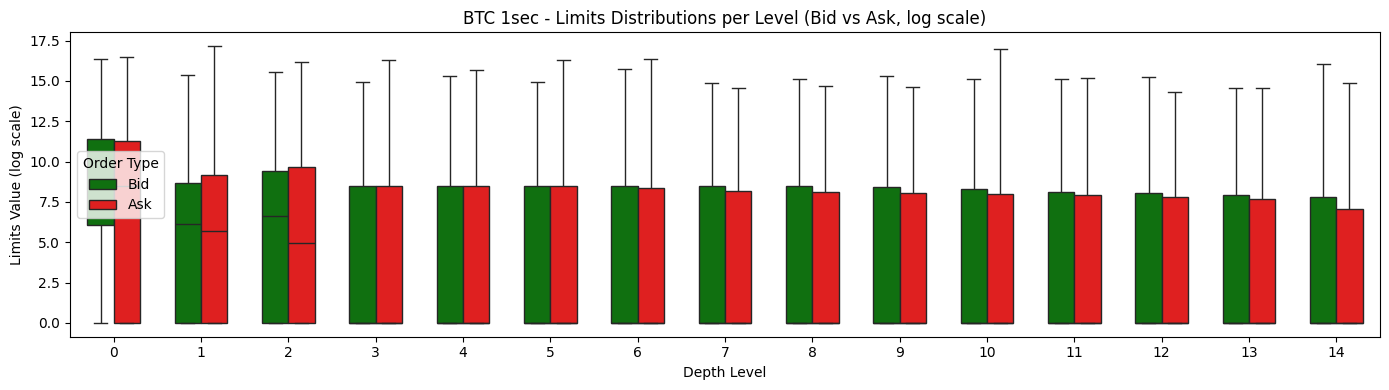

In [31]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_limit_notional_{i}'], df[f'asks_limit_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)
df_box_all['Value'] = np.log1p(df_box_all['Value']) # log scale

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)
#plt.yscale('log') 
plt.title(f'{asset} {freq} - Limits Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Limits Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Limit volume is higher for 0 level and stable on other levels.

### Market Volume

In [32]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_market_notional_{i}'], df[f'asks_market_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

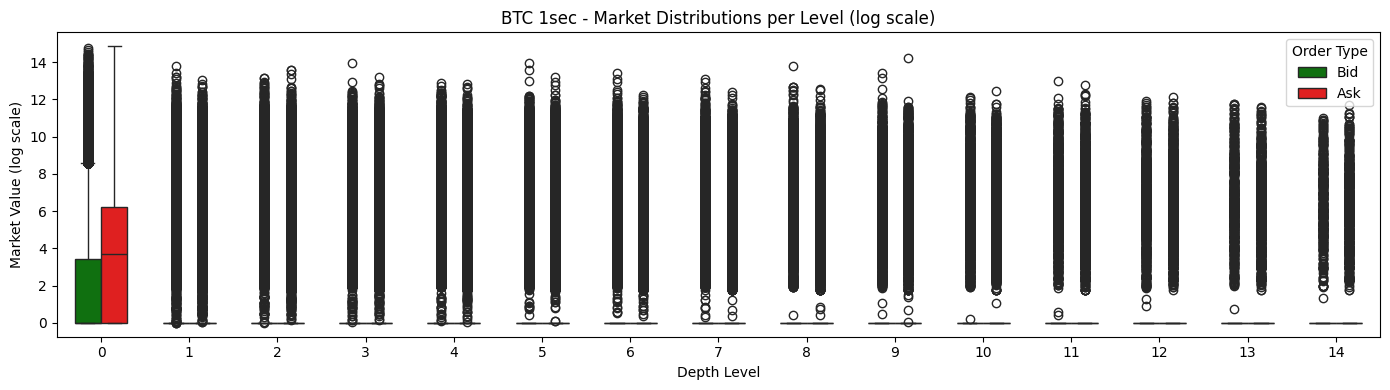

In [33]:
df_box_all['Value'] = np.log1p(df_box_all['Value'])

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Market Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Market Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Similary to the Cancel volume, the Market volume shows mainly zero values on the levels 1-14. 

### Correlation matrix

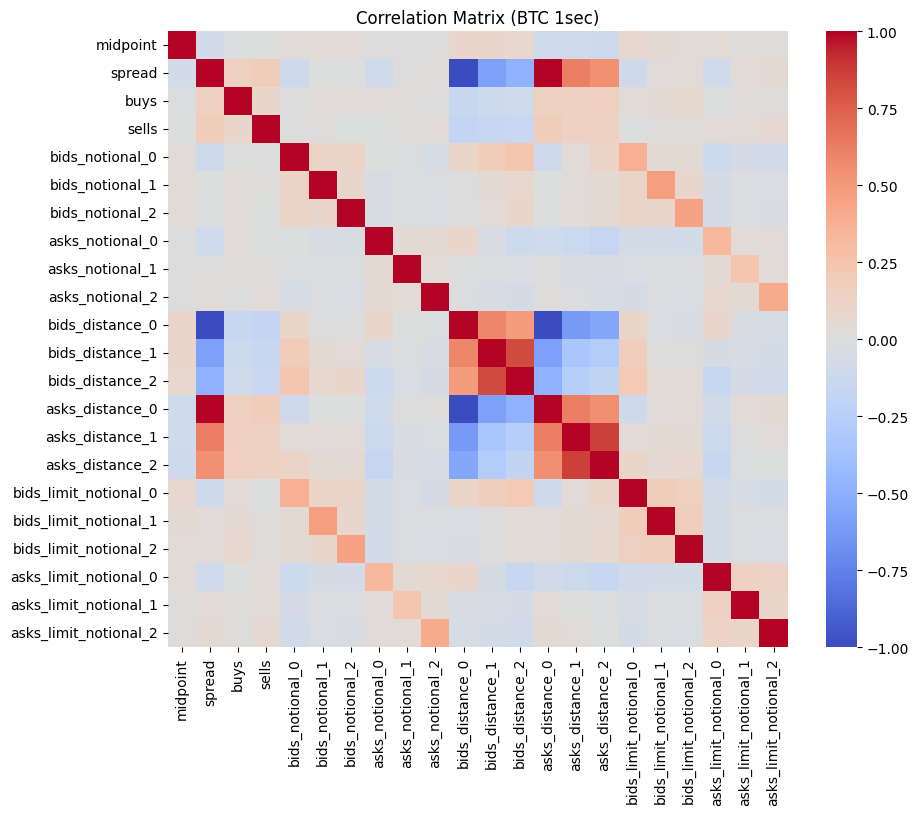

In [34]:
corr_features = ['midpoint', 'spread', 'buys', 'sells'] + \
                 [f'bids_notional_{i}' for i in range(3)] + \
                 [f'asks_notional_{i}' for i in range(3)] + \
                 [f'bids_distance_{i}' for i in range(3)] + \
                 [f'asks_distance_{i}' for i in range(3)] + \
                 [f'bids_limit_notional_{i}' for i in range(3)] + \
                 [f'asks_limit_notional_{i}' for i in range(3)]

corr = df[corr_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix ({} {})'.format(asset, freq))
plt.show()

There is a weak positive correlation between spread&sells and buys&sells, which usually make sence it any market. 

Also, there is a strong negative correlation between **spread** & **bids_distance_0** and strong positive correlation between **spread** & **asks_distance_0**. (the correlations decreases in absolute values for deeper levels)

There is strong negative correlation between **bids_distance_0** & **asks_distance_0**, whcih is also logically correct, because these features depends on the market activity at the considered time interval.